In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
t1 = dt.datetime.now()

In [3]:
# check python version
sys.version

'3.6.9 (default, Dec  8 2021, 21:08:43) \n[GCC 8.4.0]'

In [4]:
# load input training dataset

home_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data/april_2016"

trainDS_csv = "out9cam3bands_ILATM2_20160420_204606.csv"
# trainDS_csv = "oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv"


ds_fp = os.path.join(home_dir, trainDS_csv)
os.path.isfile(ds_fp)

True

In [5]:
# label output file

name_tag = 'insample_'
date_tag = '20apr_'#lon230_231_'
output_filename = name_tag+date_tag+trainDS_csv.split('.')[0]+'.csv'
output_filename

'insample_20apr_out9cam3bands_ILATM2_20160420_204606.csv'

In [6]:
# read data

ds_3cam = pd.read_csv(ds_fp, engine='python')#, dtype={'An_r':np.float64})#, encoding= 'unicode_escape')


In [7]:
# check dtypes after reading dataset

ds_3cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6419 entries, 0 to 6418
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                6419 non-null   int64  
 1   orbit               6419 non-null   int64  
 2   block               6419 non-null   int64  
 3   line                6419 non-null   int64  
 4   sample              6419 non-null   int64  
 5   lat                 6419 non-null   float64
 6   lon                 6419 non-null   float64
 7   Da_r                6419 non-null   float64
 8   Ca_r                6419 non-null   float64
 9   Ba_r                6419 non-null   float64
 10  Aa_r                6419 non-null   float64
 11  An_r                6419 non-null   float64
 12  An_g                6419 non-null   float64
 13  An_b                6419 non-null   float64
 14  An_nir              6419 non-null   float64
 15  Af_r                6419 non-null   float64
 16  Bf_r  

In [8]:
# confirm dtypes after reading dataset
# ds_3cam = ds_3cam.astype({"line": float})

In [9]:
# ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
ds_3cam.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', 'Da_r',
       'Ca_r', 'Ba_r', 'Aa_r', 'An_r', 'An_g', 'An_b', 'An_nir', 'Af_r',
       'Bf_r', 'Cf_r', 'Df_r', 'mean_ATM_roughness', 'ATM_start_time',
       'ATM_end_time'],
      dtype='object')

In [10]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
# xlon = ds_3cam[' lon']
# ylat = ds_3cam[' lat']

xlon = ds_3cam['lon']
ylat = ds_3cam['lat']
# xlon
ylat[0]

71.773376

In [11]:
margin = 2 # buffer to add to the range

lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [12]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

69.372725
73.77355
203.98671000000002
208.475435


In [13]:
# for plotting needed 
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [14]:
# # ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [15]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [16]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [17]:
# needed for plotting
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

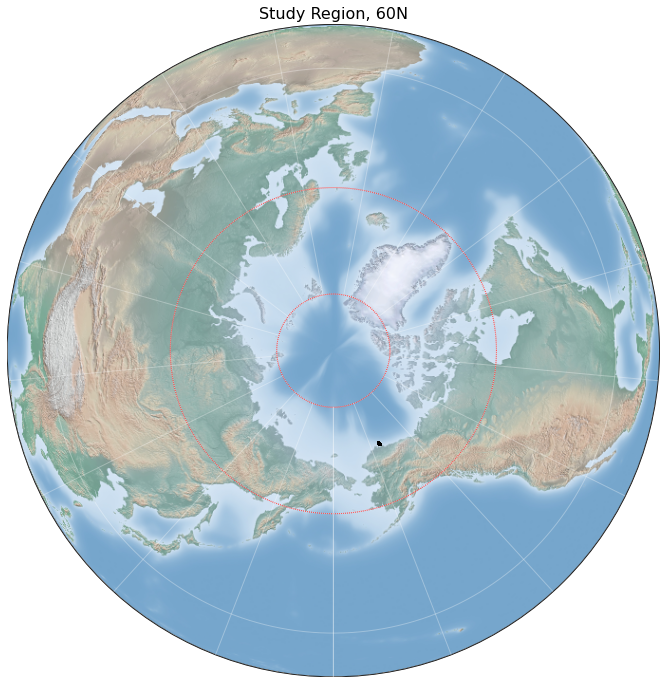

In [18]:
# run with oython >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon, ylat)

In [19]:
ds_3cam['ATM_start_time'].min()

'2016-04-20T20:46:06Z'

In [20]:
ds_3cam['ATM_end_time'].max()

'2016-04-20T20:46:06Z'

## filter ATM locations

In [21]:
# extract transect by date
# filter for 19-april and then plot the transect for both my method and old method and then compare...

transect = ds_3cam.loc[(ds_3cam['ATM_start_time'] >= '2016-04-20T01:00:00Z') & 
                         (ds_3cam['ATM_end_time'] <= '2016-04-20T23:00:00Z')]  # should include T & Z?


In [22]:
# transect.head()

In [23]:
# transect['lon'].min()

In [24]:
# transect['lon'].max()

In [25]:
# extract transect by guessing longitudes

# transect = transect.loc[(transect[' lon'] > 230.0) & 
#                         (transect[' lon'] < 231.0)]


In [26]:
transect.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6419 entries, 0 to 6418
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                6419 non-null   int64  
 1   orbit               6419 non-null   int64  
 2   block               6419 non-null   int64  
 3   line                6419 non-null   int64  
 4   sample              6419 non-null   int64  
 5   lat                 6419 non-null   float64
 6   lon                 6419 non-null   float64
 7   Da_r                6419 non-null   float64
 8   Ca_r                6419 non-null   float64
 9   Ba_r                6419 non-null   float64
 10  Aa_r                6419 non-null   float64
 11  An_r                6419 non-null   float64
 12  An_g                6419 non-null   float64
 13  An_b                6419 non-null   float64
 14  An_nir              6419 non-null   float64
 15  Af_r                6419 non-null   float64
 16  Bf_r  

In [27]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect.head()

# set that column as index
# lon_subset.set_index['index']

path  orbit  block  line  sample        lat         lon      Da_r     Ca_r  \
1   161  86908      6   426    1393  71.773376  205.988274  10.46411  7.93529   
2   161  86908      6   426    1393  71.773550  205.989962  10.46411  7.93529   
3   161  86908      6   426    1393  71.773419  205.988687  10.46411  7.93529   
4   161  86908      6   426    1394  71.772951  205.986710  10.37691  7.97889   
5   161  86908      6   426    1393  71.773129  205.988430  10.46411  7.93529   

      Ba_r  ...     An_g     An_b   An_nir     Af_r     Bf_r      Cf_r  Df_r  \
1  6.19127  ...  3.70232  7.84794  4.66525  6.32207  9.46130  16.13218  -1.0   
2  6.19127  ...  3.70232  7.84794  4.66525  6.32207  9.46130  16.13218  -1.0   
3  6.19127  ...  3.70232  7.84794  4.66525  6.32207  9.46130  16.13218  -1.0   
4  6.23487  ...  3.83299  8.02234  4.83965  6.32207  9.63571  16.35018  -1.0   
5  6.19127  ...  3.70232  7.84794  4.66525  6.32207  9.46130  16.13218  -1.0   

   mean_ATM_roughness        ATM_start_time          ATM_end_time  
1               10.18  2016-04-20T20:46:06Z  2016-04-20T20:46:06Z  
2                9.23  2016-04-20T20:46:06Z  2016-04-20T20:46:06Z  
3               13.58  2016-04-20T20:46:06Z  2016-04-20T20:46:06Z  
4                5.42  2016-04-20T20:46:06Z  2016-04-20T20:46:06Z  
5                8.89  2016-04-20T20:46:06Z  2016-04-20T20:46:06Z  

[5 rows x 22 columns]

In [28]:
# needed for plotting

xlon_subset = transect['lon']
ylat_subset = transect['lat']

0

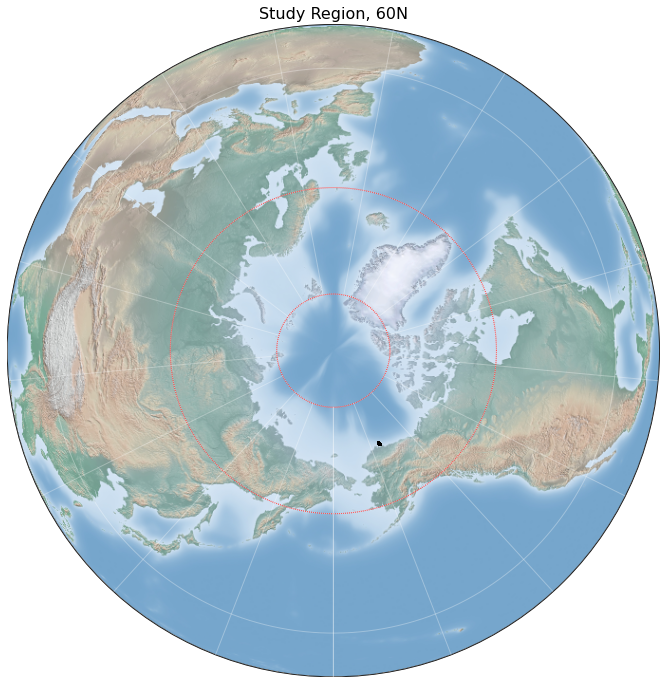

In [29]:
# run with python >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon_subset, ylat_subset)

In [30]:
# extract transect data & write it out


# output_path = home_dir
# output_file_fp = os.path.join(output_path, output_filename)
# transect.to_csv(output_file_fp)
# output_file_fp

In [31]:
t2 = dt.datetime.now()
runtime = t2-t1
runtime

datetime.timedelta(0, 8, 815743)